In [14]:
#숫자 분류 코드
#출처 :https://bcho.tistory.com/1154
import tensorflow as tf
tf.reset_default_graph()

#데이터 로딩
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)



#모델 생성
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]),name='W')
b = tf.Variable(tf.zeros([10]),name='b')
k = tf.matmul(x, W) + b
y = tf.nn.softmax(k)
#y = softmax (W*x + b)

#코스트함수와 옵티마이저 정의
y_ = tf.placeholder(tf.float32, [None, 10],name='y')                                                                               
learning_rate = 0.5
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = k,labels = y_))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


#세션 초기화
print ("Training")
sess = tf.Session()
    #텐서보드
writer=tf.summary.FileWriter('./logs',sess.graph)

init = tf.global_variables_initializer() #.run()
sess.run(init)

# 트레이닝 시작
for _ in range(1000):
    # 1000번씩, 전체 데이타에서 100개씩 뽑아서 트레이닝을 함.  
    batch_xs, batch_ys = mnist.train.next_batch(100)
    
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
print ('b is ',sess.run(b))
print('W is',sess.run(W))

#검증 코드
print ("Testing model")
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('accuracy ',sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
print ("done")




Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
Training
b is  [-0.38241622  0.38612354  0.10874937 -0.2889656   0.00317752  1.2940036
 -0.11731893  0.64125395 -1.4189347  -0.22567171]
W is [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing model


TypeError: run() missing 1 required positional argument: 'fetches'

In [13]:
print(sess.run(train_step, feed_dict={x: mnist.test.images}),"qt")

InvalidArgumentError: You must feed a value for placeholder tensor 'y' with dtype float and shape [?,10]
	 [[node y (defined at C:\Program Files\anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'y':
  File "C:\Program Files\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Program Files\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Program Files\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Program Files\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Program Files\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Program Files\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Program Files\anaconda3\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\Program Files\anaconda3\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\Program Files\anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Program Files\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Program Files\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Program Files\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Program Files\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Program Files\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Program Files\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Program Files\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Program Files\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Program Files\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Program Files\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Program Files\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Program Files\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Program Files\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Program Files\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Program Files\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Program Files\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Program Files\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Program Files\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-21bf3b4b07ed>", line 22, in <module>
    y_ = tf.placeholder(tf.float32, [None, 10],name='y')
  File "C:\Program Files\anaconda3\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Program Files\anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 6669, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Program Files\anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\Program Files\anaconda3\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Program Files\anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\Program Files\anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\Program Files\anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [2]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import PIL.Image as pilimg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from PIL import Image 
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import FinanceDataReader as fdr
import mglearn
import sklearn

#분류 모델
from sklearn.svm import LinearSVC
from sklearn import neighbors,svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import FinanceDataReader as fdr
import mglearn
import tensorflow as tf
import sklearn

#분류 모델
from sklearn.svm import LinearSVC
from sklearn import neighbors,svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
#스케일러
from sklearn.preprocessing import MinMaxScaler

#성과 평가
from sklearn.metrics import confusion_matrix #오차행렬
from sklearn.metrics import accuracy_score #정확도
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [110]:
fuck=np.array([img4,X_train[0]])

NameError: name 'img4' is not defined

NameError: name 'fuck' is not defined

In [231]:
X_train[0:3].shape

(3, 784)

In [123]:
if 3==3 or 2==5:
    print('qt')

In [49]:
scaler = MinMaxScaler()

In [51]:
img2_trans=scaler.fit(img2.reshape(-1,1)).transform(img2.reshape(-1,1))

In [36]:
X_test[1].shape

(784,)

In [107]:
img2[2].shape

(28, 3)

In [108]:
# 사이킷런의 예측 ------------------------------------------------

# mnist 데이터셋 로딩

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels
y_test = mnist.test.labels
# -------------------------------

# 이미지 로딩
img=np.array(pilimg.open("images/img4.png"))

# -------------------------------

# 이미지 rgb를 이진 성분(0,1)로 다듬음
list = []
for x in range(28):
    for y in range(28):
        if img[x][y].sum() > 600:
            list.append(0)
        else:
            list.append(1)
# -------------------------------

img = np.array([list])

reg = RandomForestClassifier().fit(X_train,y_train)
reg.predict(img)


Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


C:\Program Files\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [106]:
reg.score(X_test,y_test)

0.8642

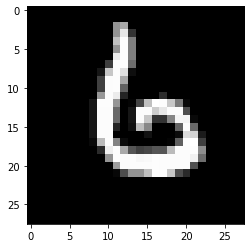

In [107]:
# 데이터셋 내의 숫자 '6'
img_x=X_train[3206].reshape(-1,28)
plt.imshow(img_x,cmap='gray')


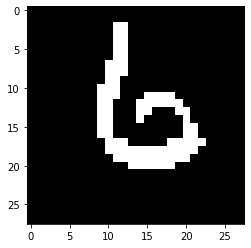

In [101]:
# 내가 그린 숫자 6
img_x=img.reshape(-1,28)
plt.imshow(img_x,cmap='gray')

In [58]:
if reg.predict(img)[5]==4:
    print("4입니다")
else:
    print("ㅄ")

IndexError: index 5 is out of bounds for axis 0 with size 1

In [16]:
a=3
print(5)

5


In [21]:
tf.zeros([10])

<tf.Tensor 'zeros_5:0' shape=(10,) dtype=float32>

In [48]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
14368/60000 [======>.......................] - ETA: 11s - loss: 1.3082 - acc: 0.6479

KeyboardInterrupt: 

In [82]:
#핸즈온 486페이지 RNN 구성
tf.reset_default_graph()

n_inputs = 3
n_neurons = 5
X0 = tf.placeholder(tf.float32,[None,n_inputs])
X1 = tf.placeholder(tf.float32,[None,n_inputs])
Wx=tf.Variable(tf.random_normal(shape=[n_inputs,n_neurons],dtype=tf.float32))
Wy=tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))
b=tf.Variable(tf.zeros([1,n_neurons],dtype=tf.float32))
Y0=tf.tanh(tf.matmul(X0,Wx)+b)
Y1=tf.tanh(tf.matmul(Y0,Wy)+tf.matmul(X1,Wx)+b)
init=tf.global_variables_initializer()

X0_batch =  np.array([[0,1,2],[3,4,5],[6,7,8],[9,0,1]]) #t=0
X1_batch =  np.array([[9,8,7],[0,0,0],[6,5,4],[3,2,1]]) #t=1

with tf.Session() as sess:
    init.run()
    Y0_val,Y1_val = sess.run([Y0,Y1], feed_dict={X0:X0_batch,X1:X1_batch})
    
writer = tf.summary.FileWriter('./logs',sess.graph)

print("Y0_val : \n", Y0_val)
print("Y1_val : \n", Y1_val)

Y0_val : 
 [[ 0.5558289  -0.43517375  0.91398853 -0.9187678  -0.90716517]
 [-0.6292131   0.99999905  0.9999663  -1.         -0.9846552 ]
 [-0.97085685  1.          1.         -1.         -0.99754685]
 [-1.          1.          0.99569476 -1.          0.9971551 ]]
Y1_val : 
 [[-0.9427992   1.          1.         -1.          0.04579033]
 [ 0.93328995  0.90049404 -0.7916287   0.98154134  0.91683686]
 [-0.94702864  1.          0.9999232  -1.          0.9270317 ]
 [-0.9846094   1.         -0.58143276 -0.9999806   0.92059064]]


In [74]:
#핸즈온 497페이지 ㅣ계열 훈련
tf.reset_default_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
#cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,activation=tf.nn.relu)
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,activation=tf.nn.relu),output_size=n_outputs)
outputs,states = tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

learning_rate = 0.001
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch,y_batch =  X,y
        sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
        if iteration % 100 == 0 :
            mse = loss.eval(feed_dict={X:X_batch,y:y_batch})
            print(iteration , "\nMSE:" , mse)

TypeError: The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, numpy ndarrays, or TensorHandles. For reference, the tensor object was Tensor("Placeholder:0", shape=(?, 20, 1), dtype=float32) which was passed to the feed with key Tensor("Placeholder:0", shape=(?, 20, 1), dtype=float32).

In [22]:
def graph(x):
    y = x**2 +5 
    return y
graph(3)

14

In [69]:
X=[j for j in range(-500,501)]

In [70]:
y=[graph(i) for i in range(-500,501)]

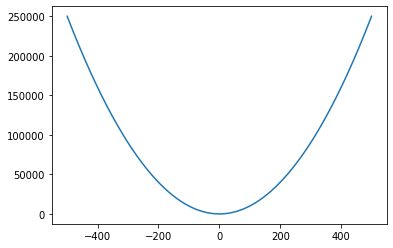

In [71]:
plt.plot(X,y)